In [1]:
import cv2
import imutils

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("picture1.png")
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
%matplotlib inline

In [5]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [6]:
# lower_red = (0, 100, 100)
# upper_red = (20, 255, 255)

lower_red = (80, 70, 50)
upper_red = (100, 255, 255)

light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])
    
    
mask = cv2.inRange(hsv, light_orange, dark_orange)
# mask = cv2.erode(mask, None, iterations=2)
# mask = cv2.dilate(mask, None, iterations=2)
    
res = cv2.bitwise_and(img, img, mask=mask)
# cv2.imshow('frame', img)
# cv2.imshow('mask', mask)
# cv2.imshow('res', res)

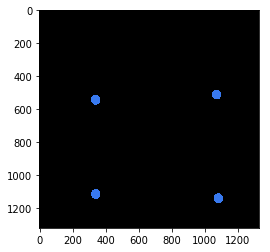

In [7]:
plt.imshow(res)

In [8]:
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)

cnts = cnts[0] if imutils.is_cv2() else cnts[1]

In [9]:
len(cnts)

4

In [10]:
positions = {"x": [], "y": []}
for c in cnts: 
    ((x, y), radius) = cv2.minEnclosingCircle(c)
    positions["x"].append(x)
    positions["y"].append(y)

In [11]:
positions

{'x': [1086.0, 343.0, 343.0, 1076.0], 'y': [1137.5, 1112.0, 542.0, 511.5]}

In [12]:
y1 = int(min(positions["y"]))
y2 = int(max(positions["y"]))
x1 = int(min(positions["x"]))
x2 = int(max(positions["x"]))

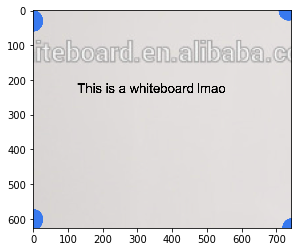

In [13]:
crop_img = img[y1:y2, x1:x2]
plt.imshow(crop_img)